In [ ]:
# A file for (not really) unit testing changes I made to the seticore Python viewer
# Noah Stiegler
# 7/1/24 

## Setup

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# Import regular packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pickle

In [3]:
# For testing my seticore fork at https://github.com/NMStiegler/seticore
# This had to be pip installed 
# If you want to install from my fork you'd use pip install "git+https://github.com/NMStiegler/seticore#egg=seticore&subdirectory=python"
from seticore import viewer
# You may also need to install pycapnp (might be a "pip install pycapnp" or maybe works with "conda install pycapnp")
# Using the base Python 3.7 conda env on the blpc1 cluster

In [ ]:
# !pip install "git+https://github.com/NMStiegler/seticore#egg=seticore&subdirectory=python"

In [4]:
# Define where the data is
# Check which server we're on (in case the data is in different places on different servers)
import socket
hostname = socket.gethostname()

# Get paths to data
if hostname == "blpc1":
    DATA_PATH = "/datax/scratch/nstieg/"
    BFR_PATH = DATA_PATH + "23A-362.sb43789194.eb44583327.60212.544836180554.9.1.AC.C704.0000.bfr5"
    STAMPS_PATH = DATA_PATH + "23A-362.sb43789194.eb44583327.60212.544836180554.9.1.AC.C704.0000.raw.seticore.0000.stamps"
else:
    raise Exception("Data path not known")


# Load in the stamps (with recipes in bfr5 file with the same name in the same location)
# and make sure they all got read in correctly
stamps_gen = viewer.read_stamps(STAMPS_PATH, find_recipe=True)
stamps = []
for stamp in stamps_gen:
    stamps.append(stamp)
    assert(stamp != None)
    assert(stamp.recipe != None)

print("Found:", len(stamps), "stamps")

Found: 49 stamps


/home/nstieg/.local/lib/python3.7/site-packages/seticore/viewer.py:125: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  self.h5 = h5py.File(filepath)


In [19]:
# Show antenna voltages and the incoherent sum
# Also testing to make sure changes to viewer.py work (title and show_signal)

def test_stamp(index):
    stamp = stamps[index]
    stamp.show_antennas(title=f"Here's a title! From stamp {index}", show_signal=True)
    stamp.show_classic_incoherent(title=f"Here's a title! From stamp {index}", show_signal=True)
    stamp.show_weighted_incoherent(title=f"Here's a title! From stamp {index}", show_signal=True)
    stamp.show_beams(title=f"Here's a title! From stamp {index}", show_signal=True)
    stamp.show_beam(0, title=f"Here's a title! From stamp {index}", show_signal=True)


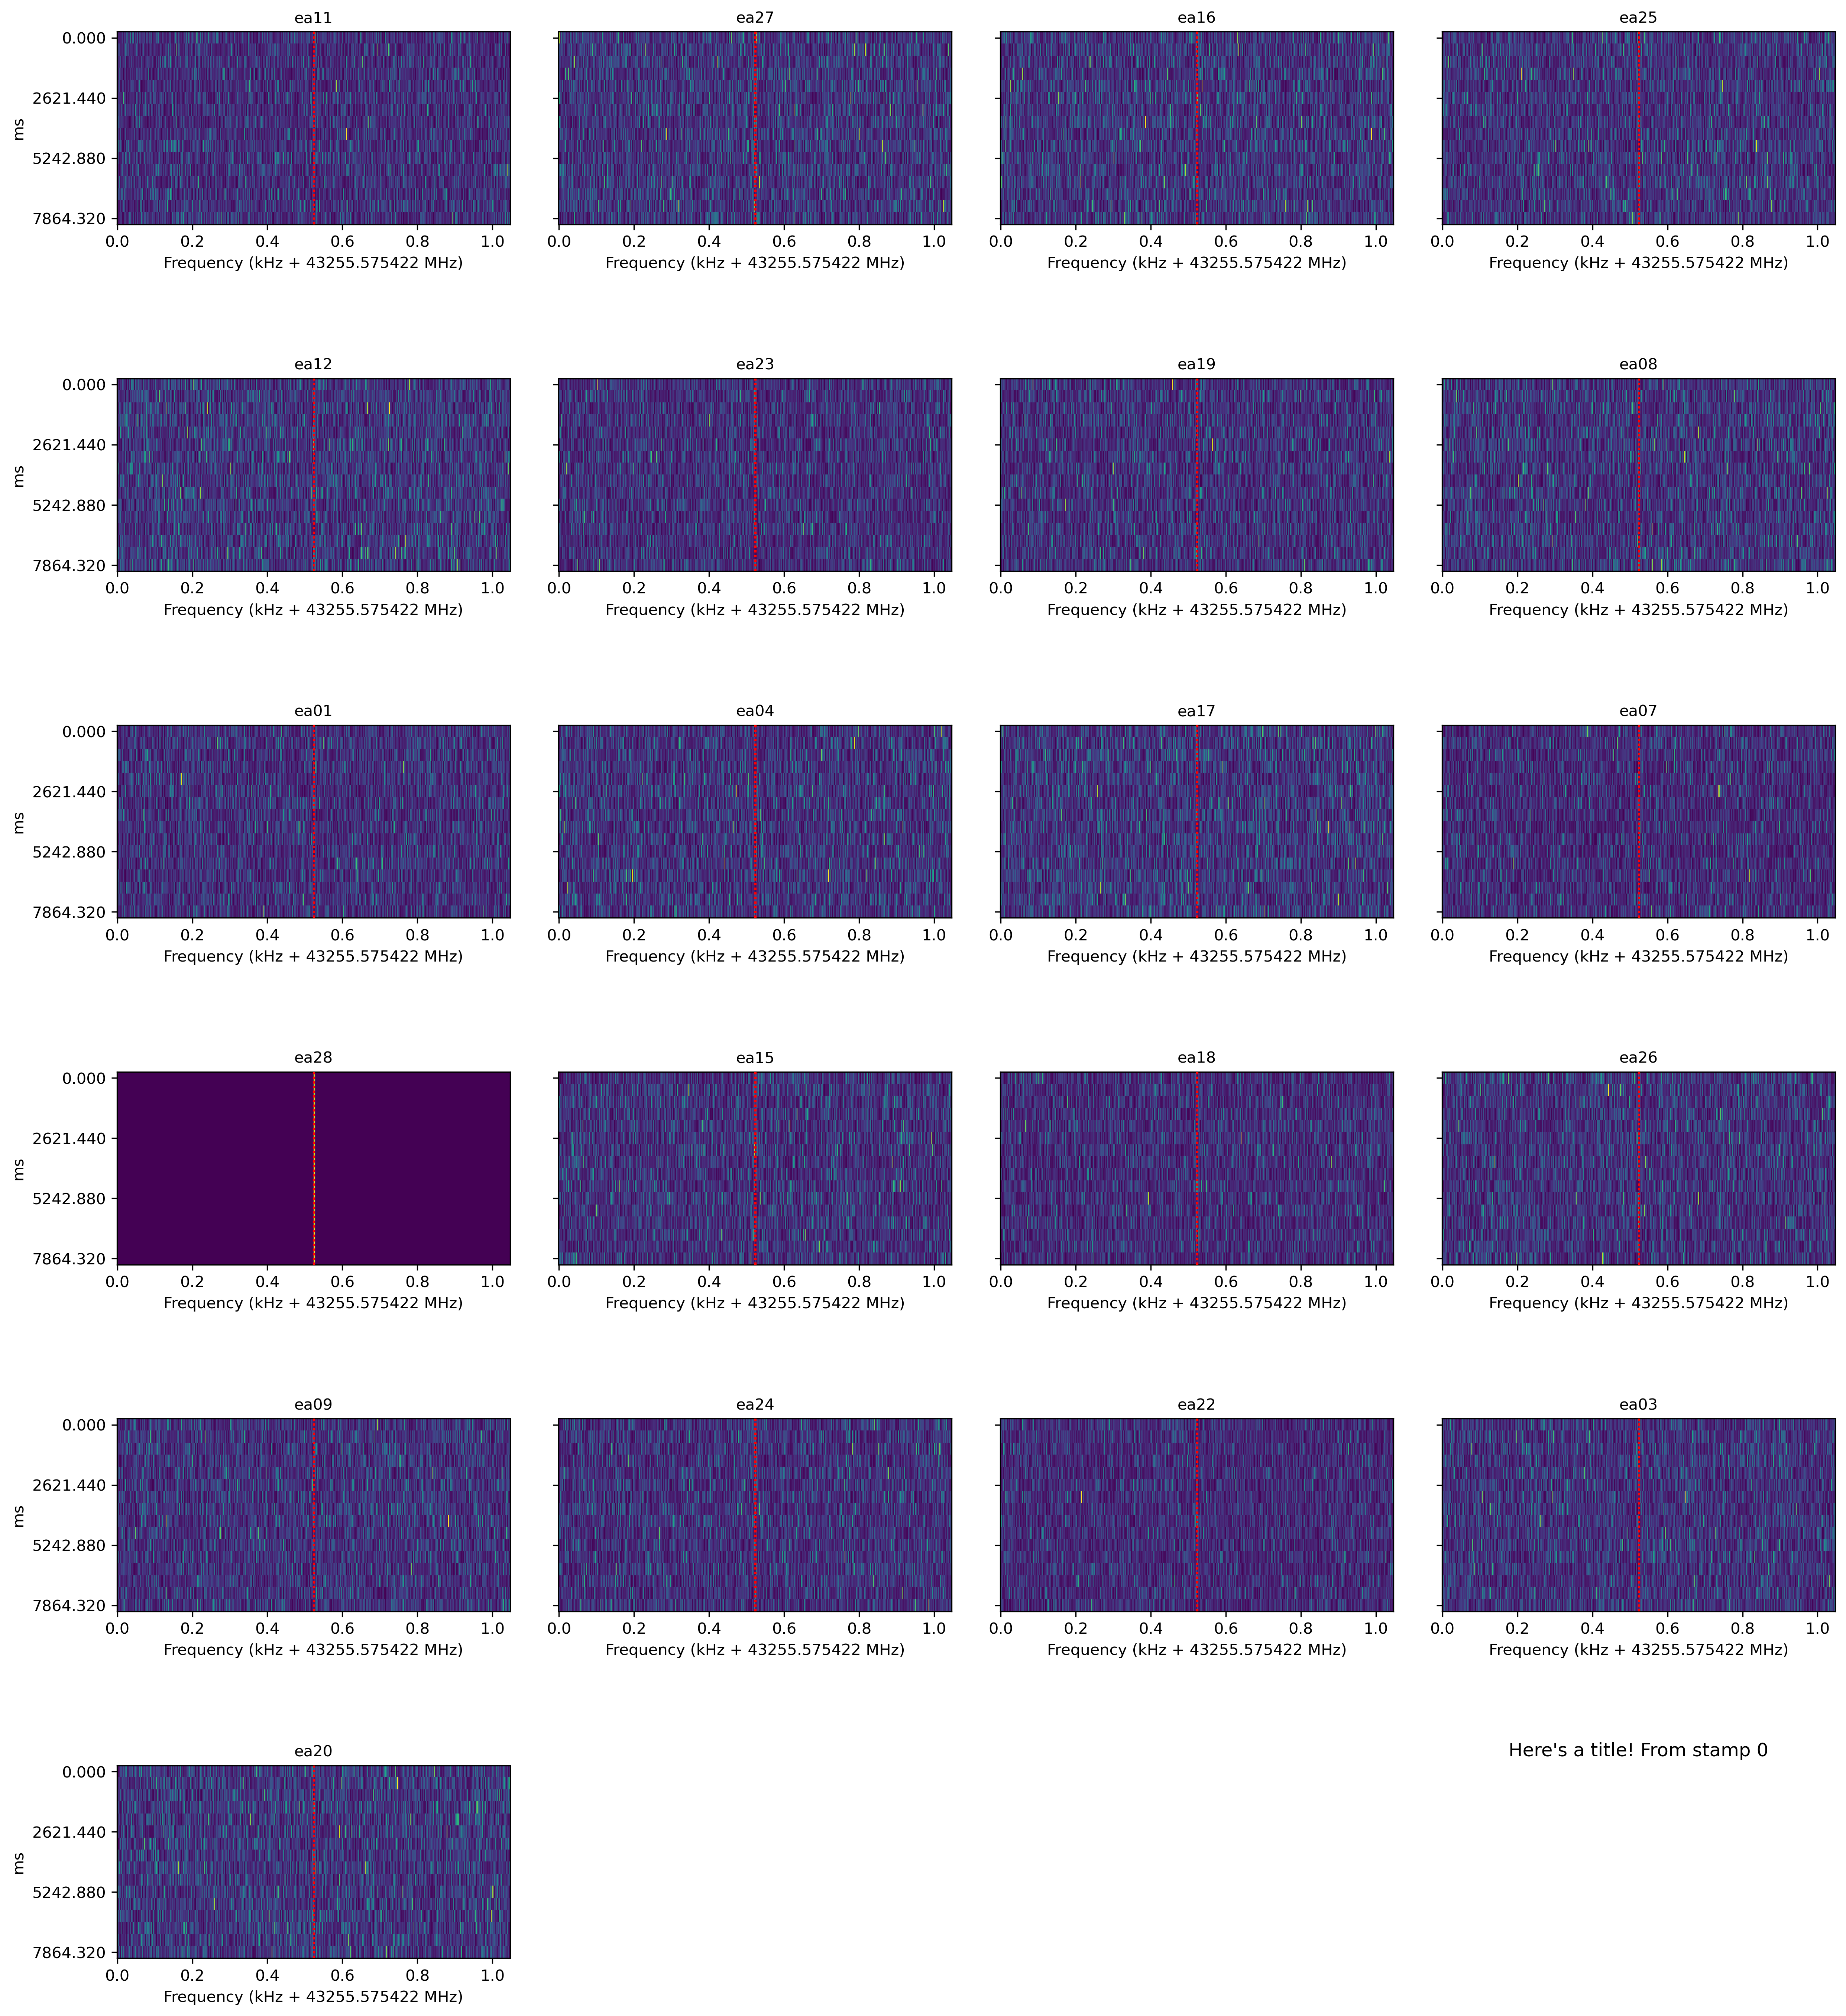

recalculated power: 1.077192e+14
local SNR: 13837.185084537112


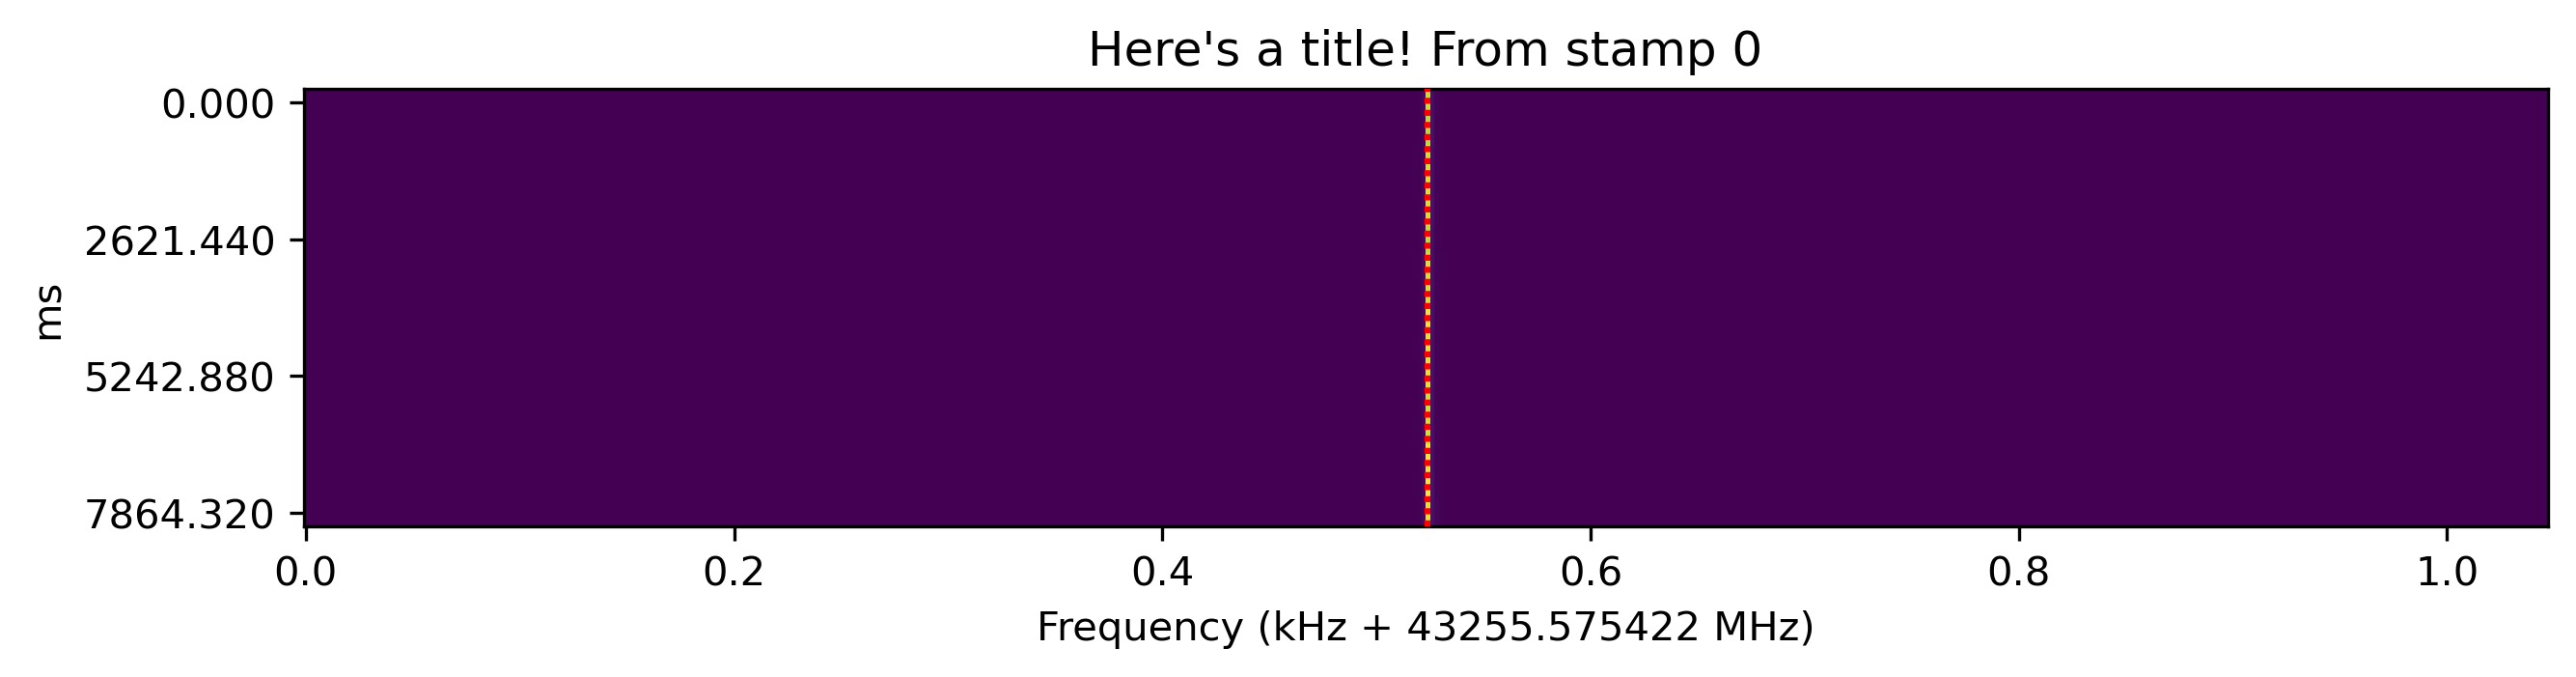

recalculated power: 1.077192e+14
local SNR: 13837.185084537108


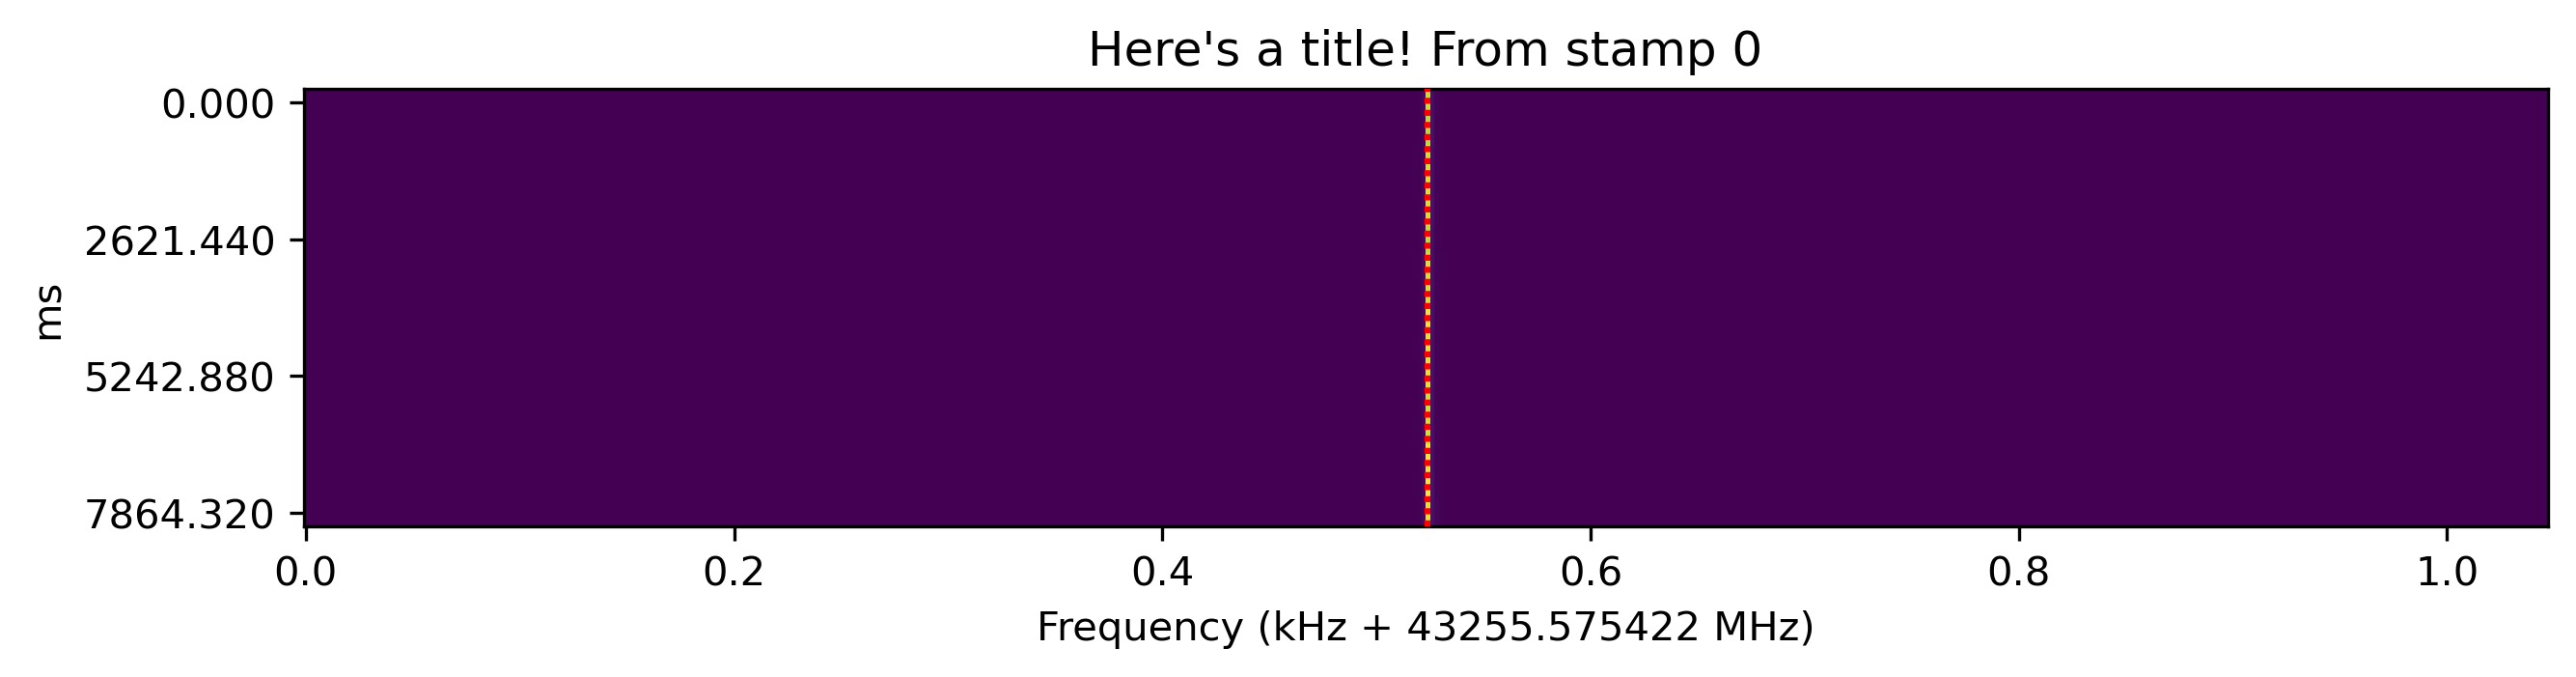

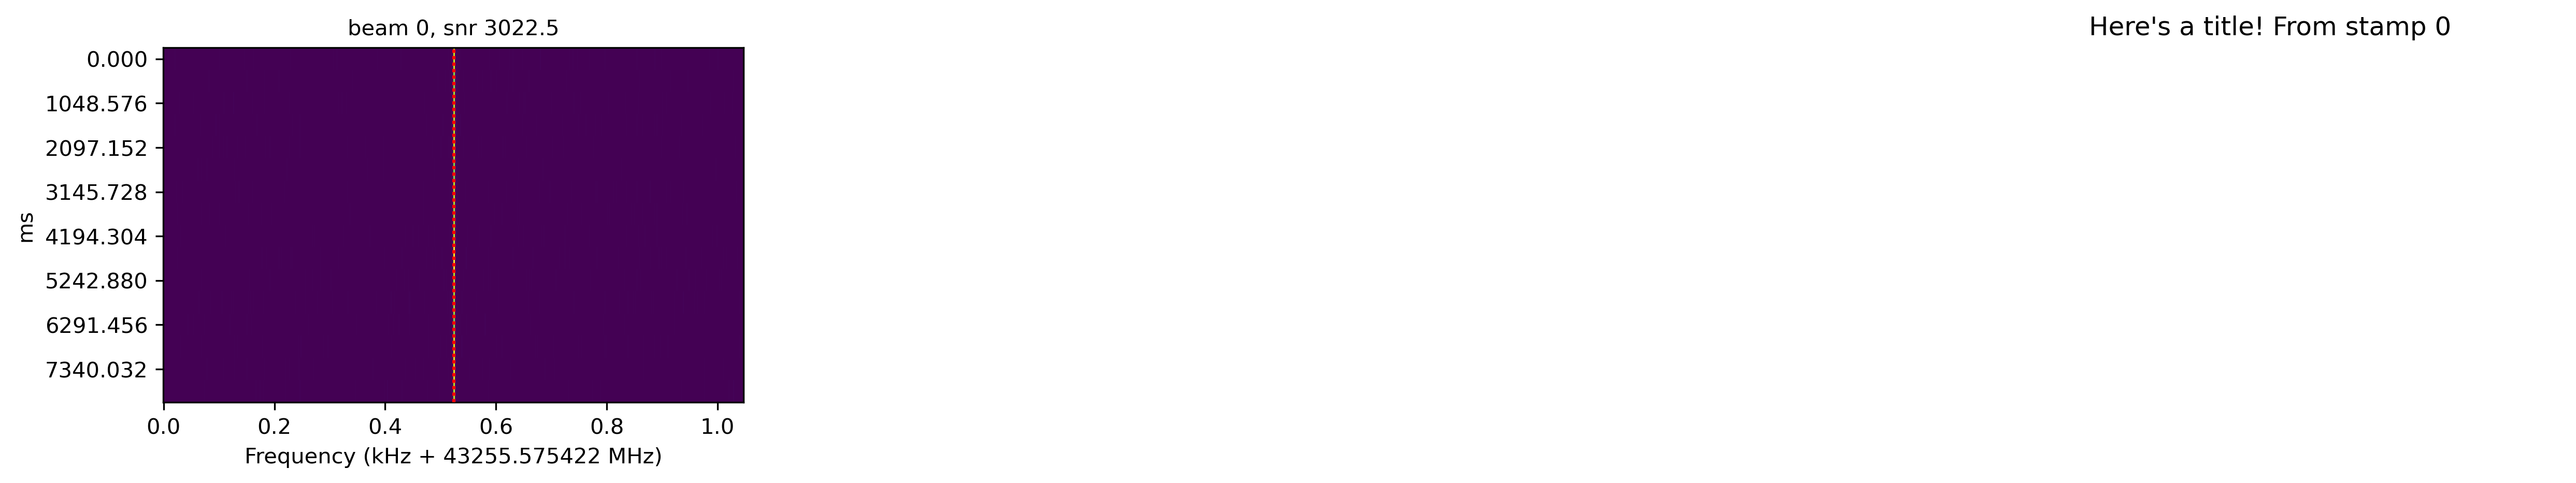

recalculated power: 1.087394e+14
local SNR: 3022.511932481911


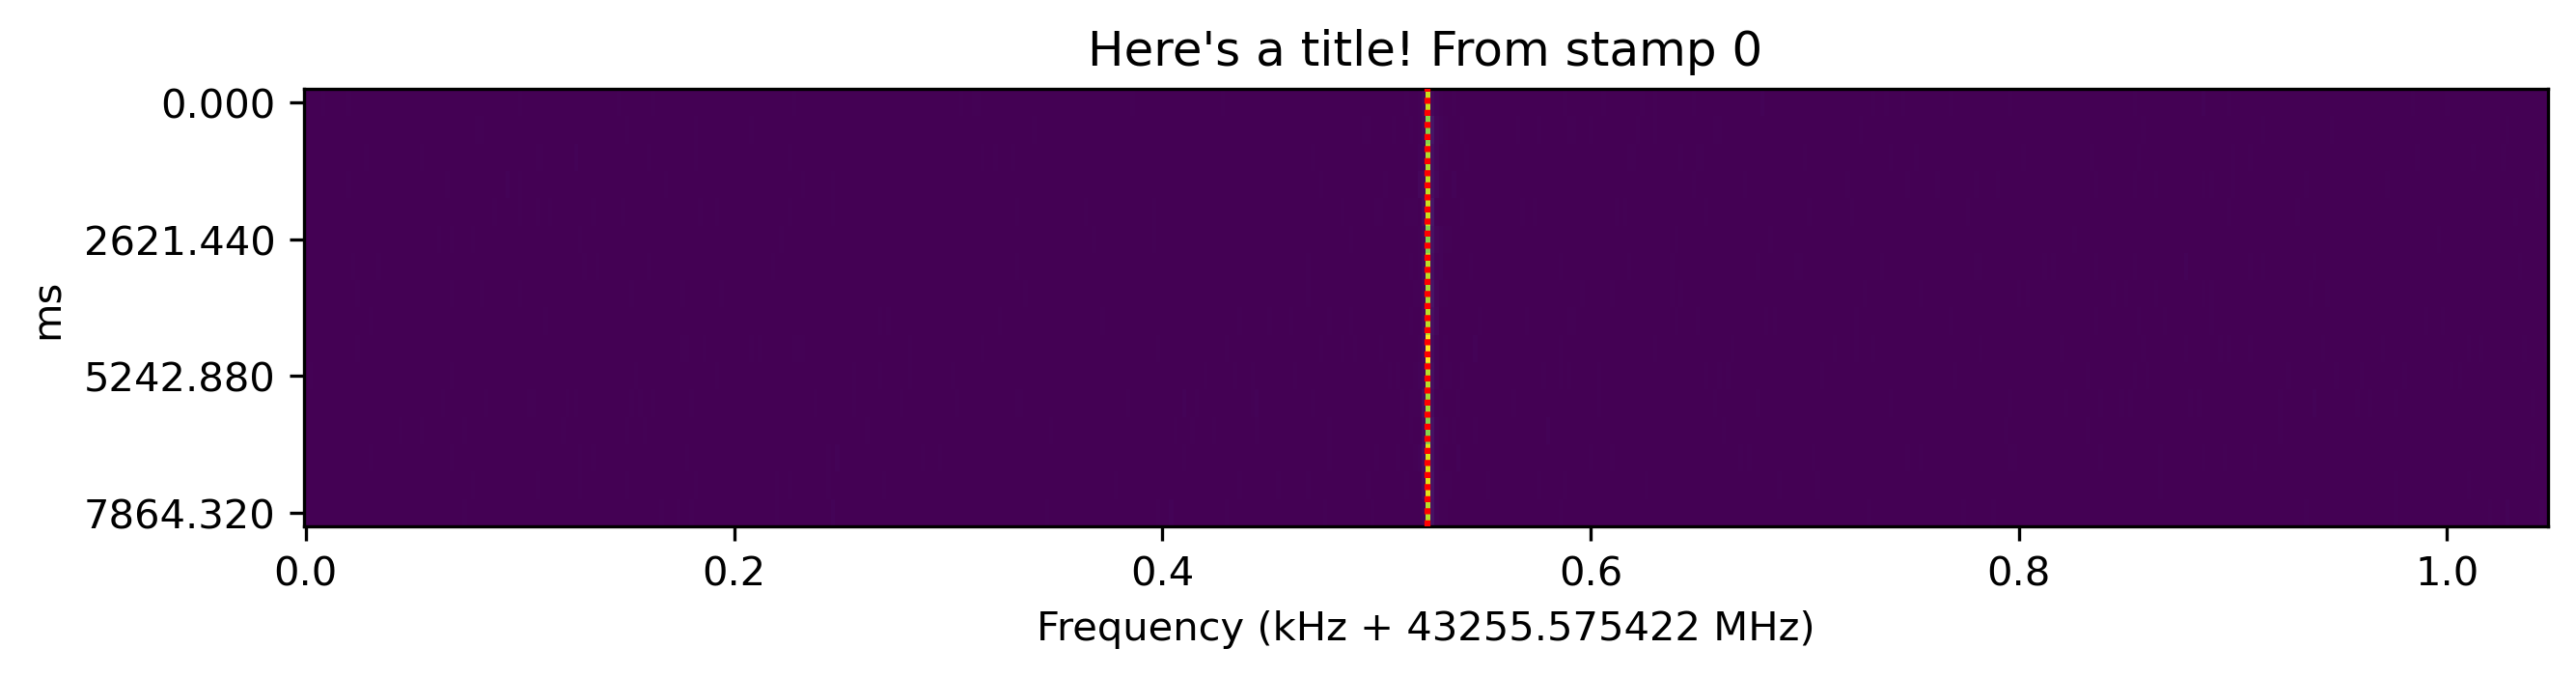

In [20]:
test_stamp(0)

In [ ]:
# Look if there are any non-0 drift rate signals to look at
for i, stamp in enumerate(stamps):
    s = stamp.stamp
    print(i, s.signal.driftRate)

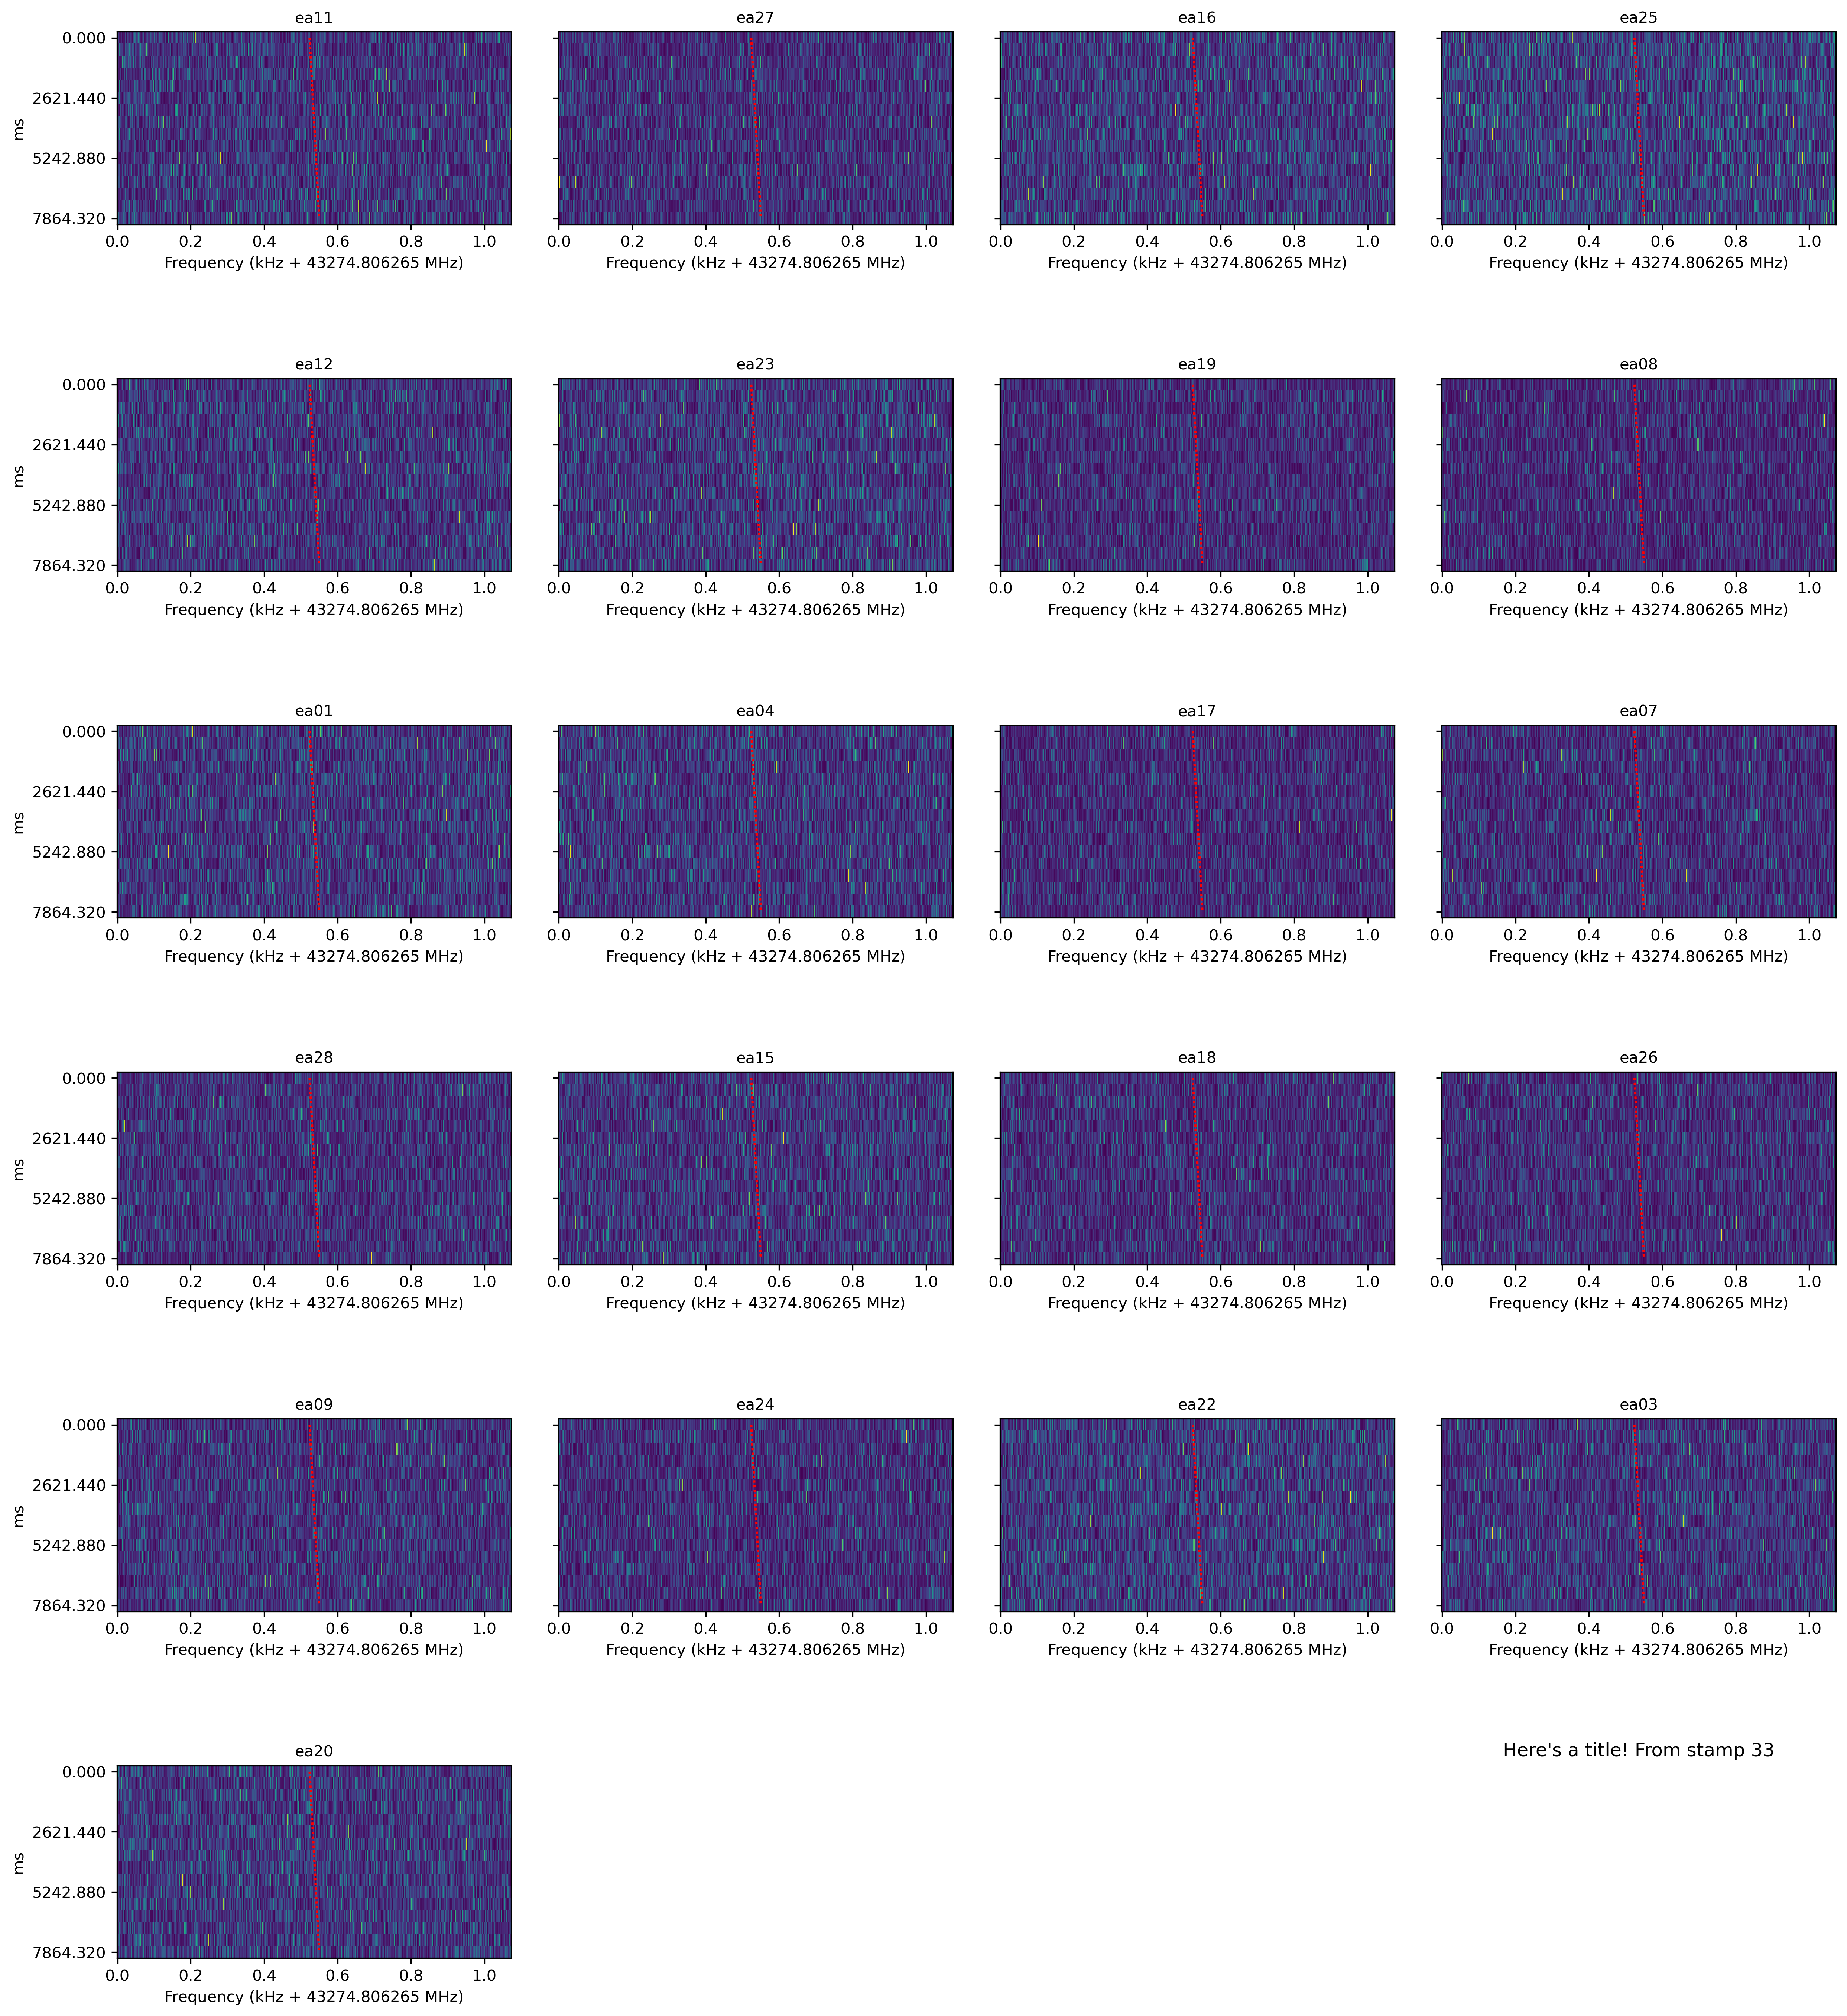

recalculated power: 2.804427e+11
local SNR: -3.294640337077011


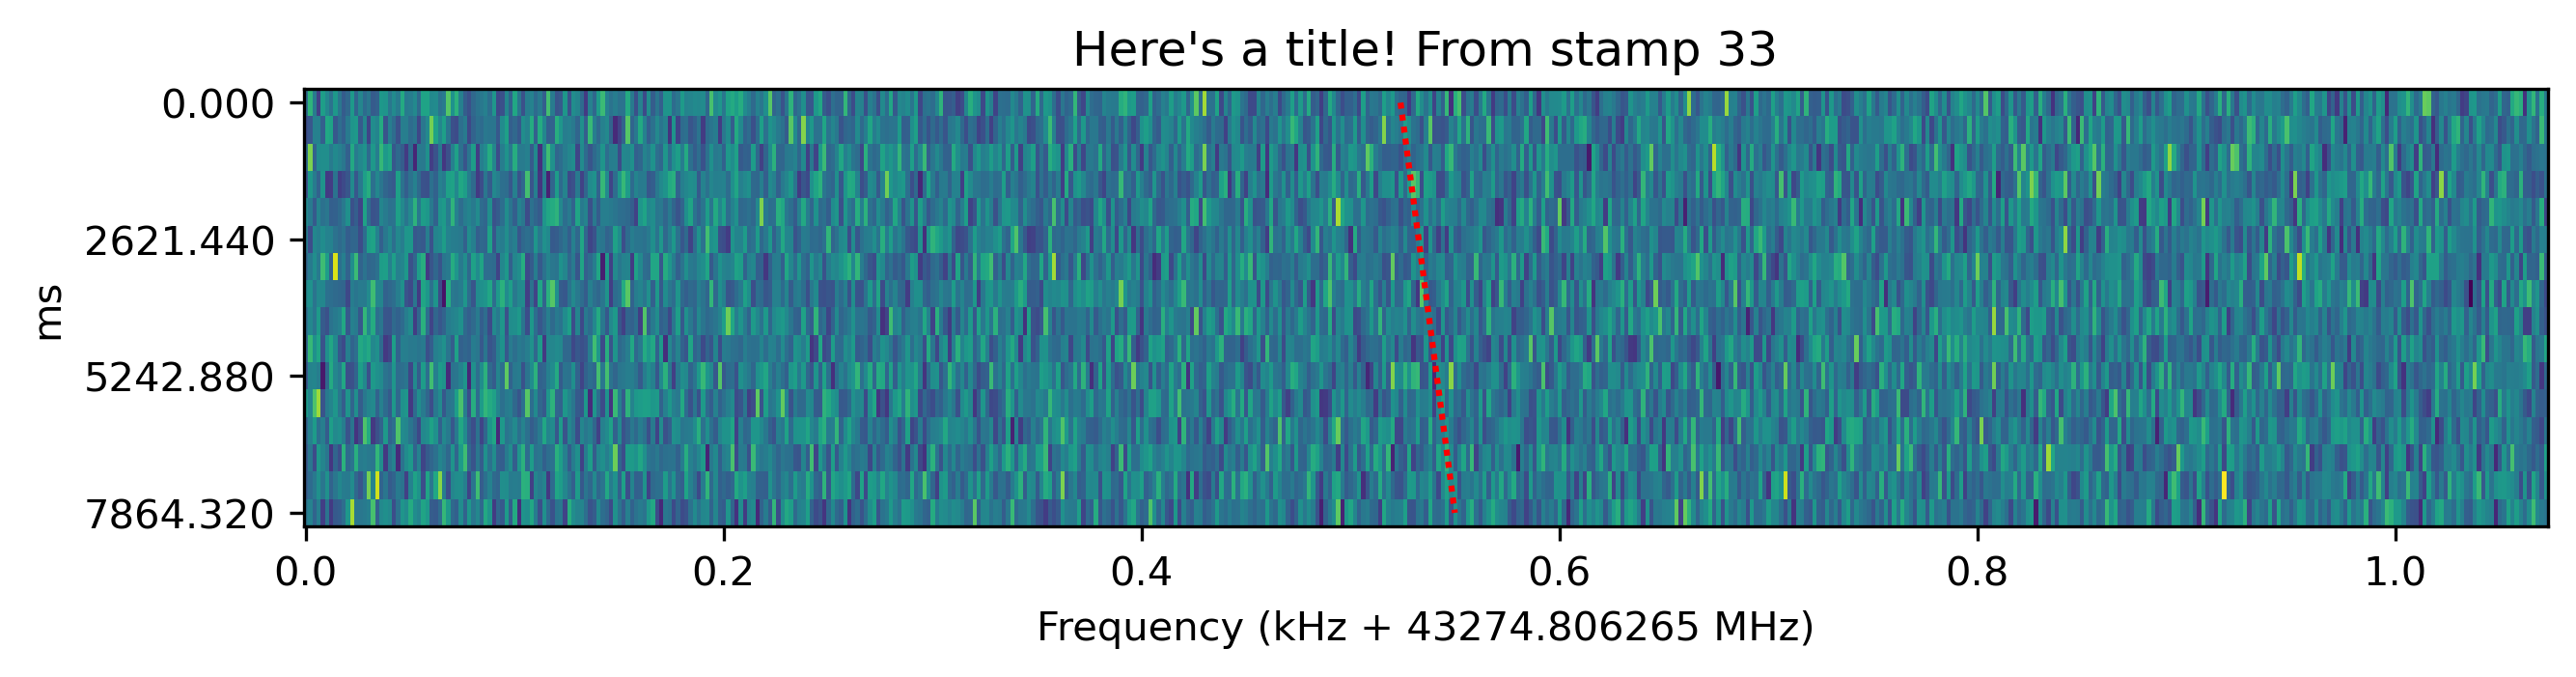

recalculated power: 2.804427e+11
local SNR: -3.2946403370770088


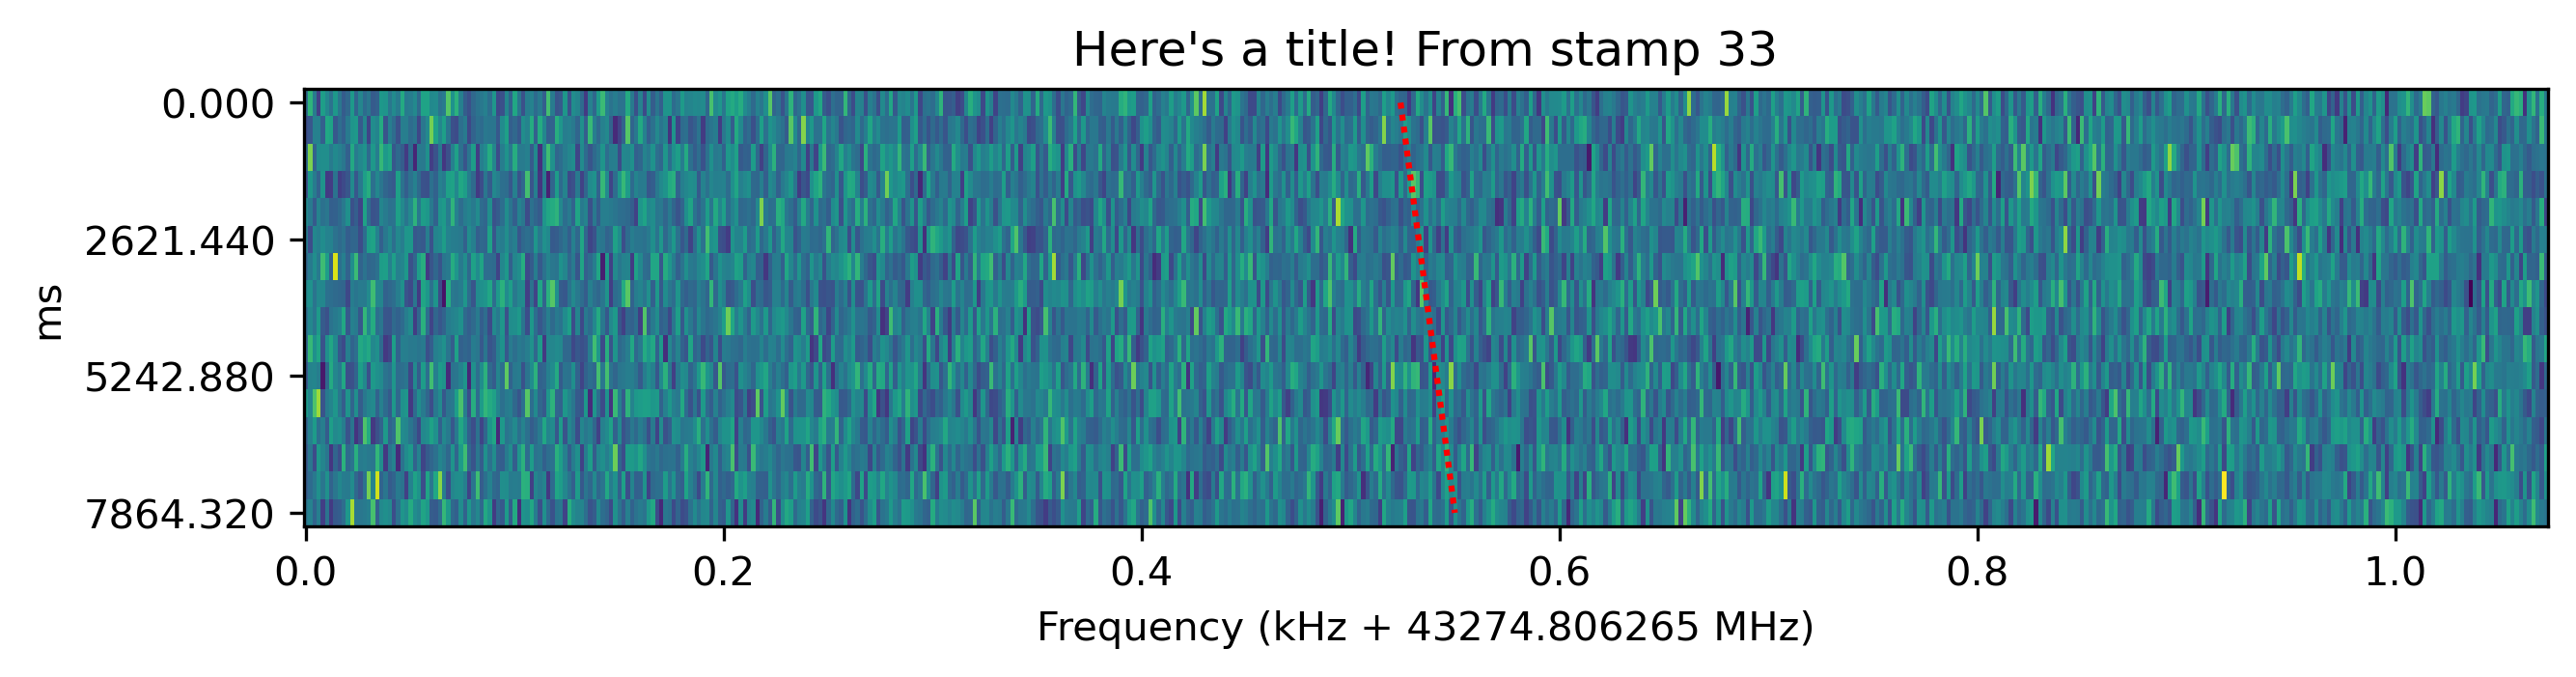

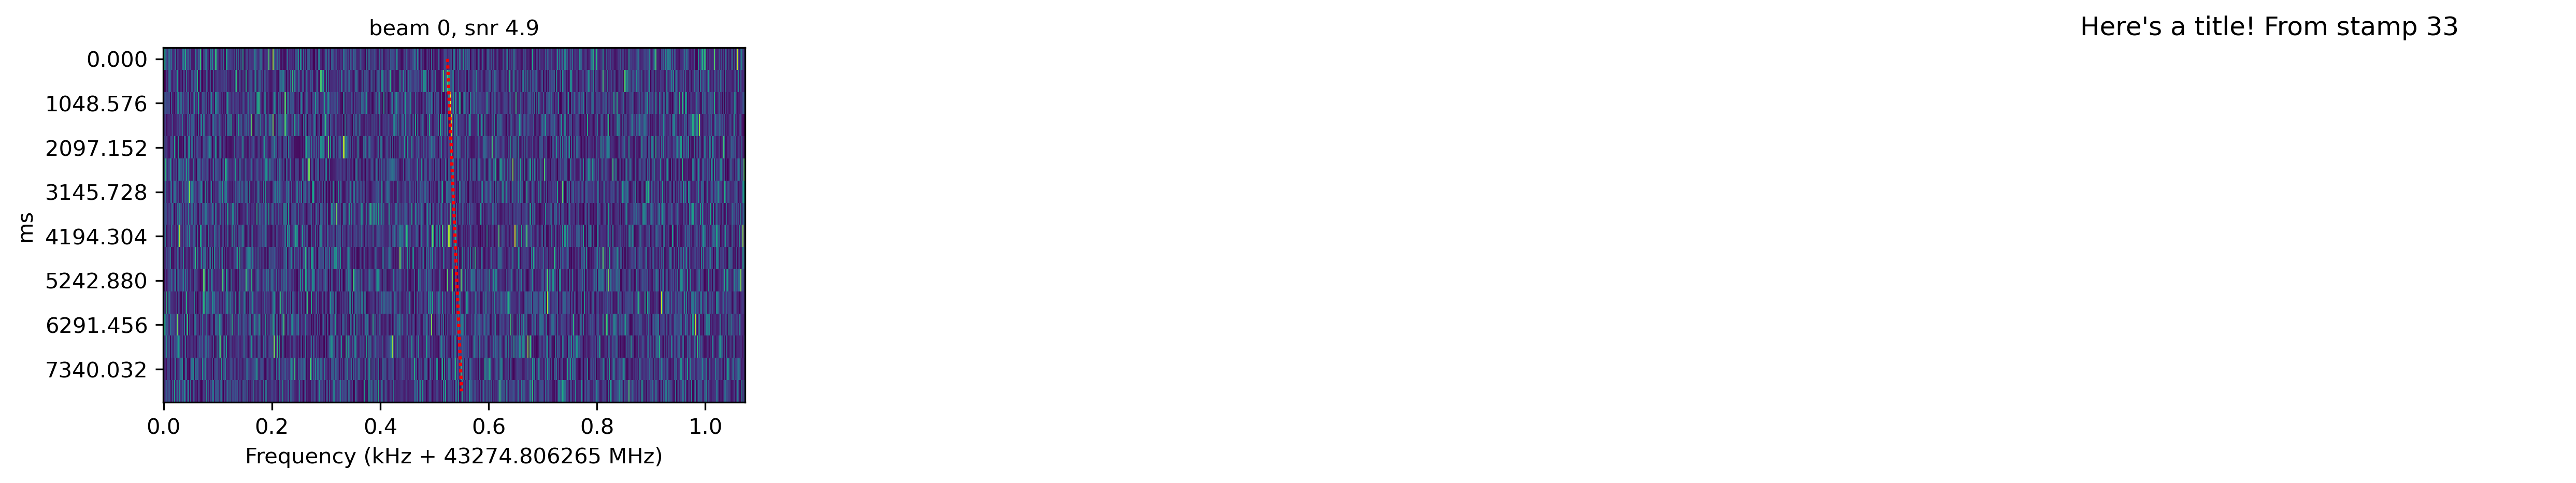

recalculated power: 6.082242e+11
local SNR: 4.9009633027900055


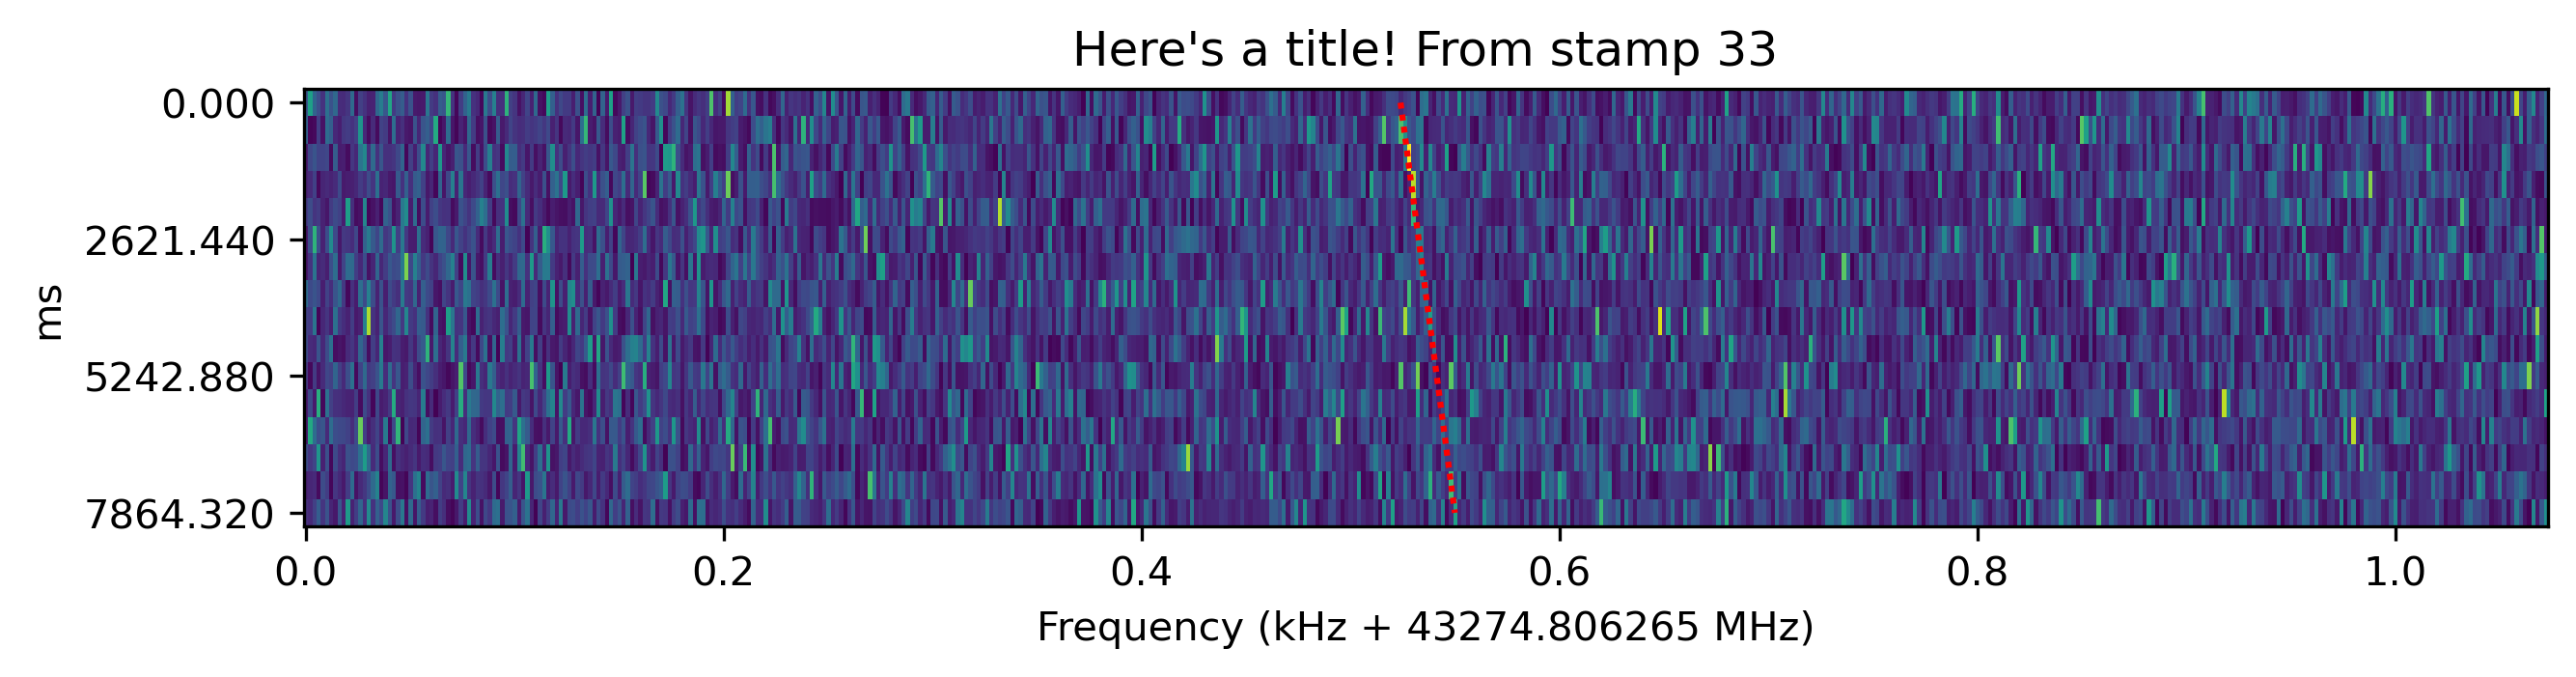

In [21]:
test_stamp(33)